In [25]:
using Revise

import PolynomialQTT
import TensorCrossInterpolation as TCI
import QuanticsGrids as QG
using CairoMakie
using LaTeXStrings

import Pkg; Pkg.status()

Project PolynomialQTT v0.1.0
Status `~/src/TCI/PolynomialQTT/Project.toml`
  [b261b2ec] TensorCrossInterpolation v0.9.6
  [37e2e46d] LinearAlgebra


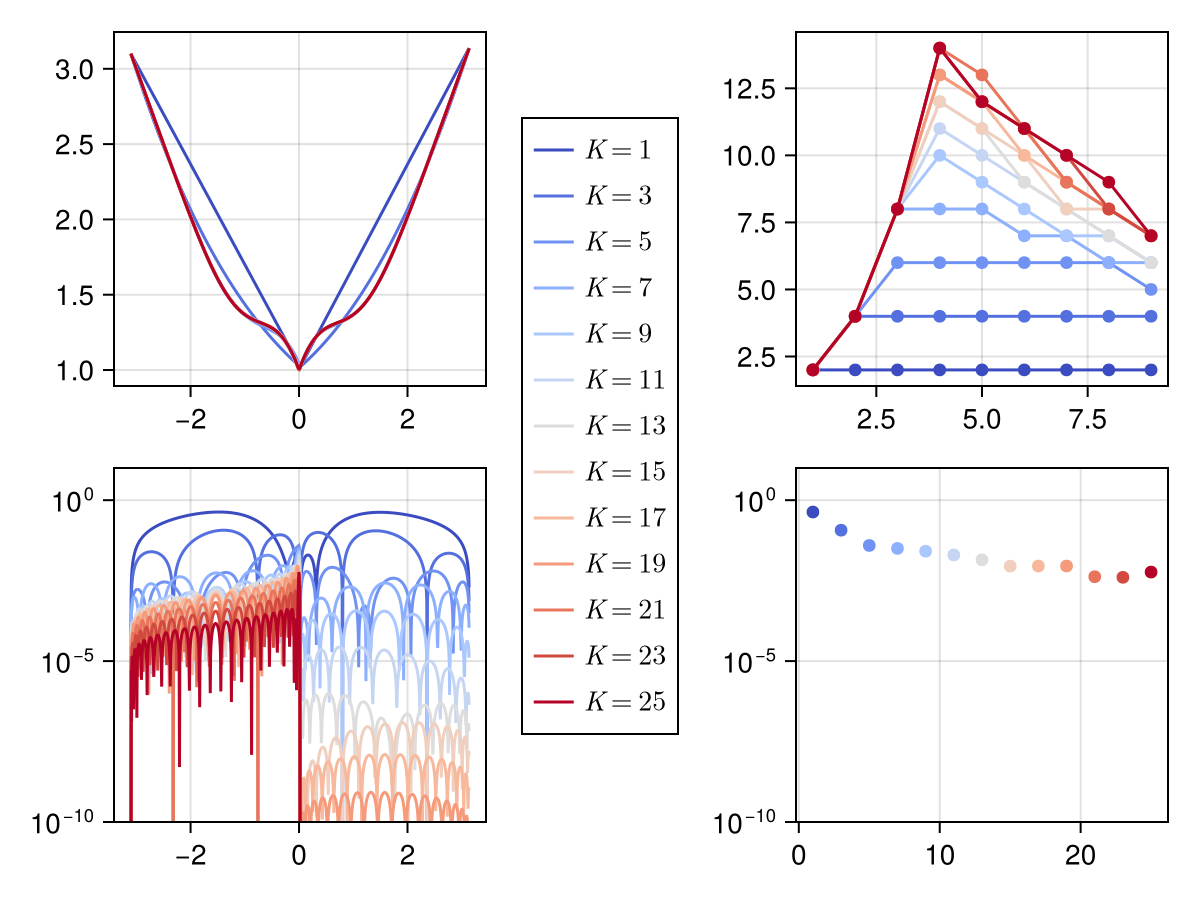

In [36]:
R = 10
a, b = -3.1, float(pi)
f(x) = exp(-x^2) + abs(x)
Kmax = 25

grid = QG.DiscretizedGrid{1}(R, a, b)

plotquantics = QG.grididx_to_quantics.(Ref(grid), 1:2^R)
plotx = QG.grididx_to_origcoord.(Ref(grid), 1:2^R)
origdata = f.(plotx)

fig = Figure()
ax = Axis(fig[1, 1])
axerr = Axis(fig[2, 1], yscale=log10)
axbonddim = Axis(fig[1, 3])
axerrK = Axis(fig[2, 3], yscale=log10)
lines!(ax, plotx, origdata)

for K in 1:2:Kmax
    tt = PolynomialQTT.interpolatesinglescale(f, a, b, R, K)
    ttdata = tt.(plotquantics)
    colorkwargs = (:color=>K, :colorrange=>(1, Kmax), :colormap=>:coolwarm)
    lines!(ax, plotx, ttdata, label=L"K=%$K"; colorkwargs...)
    lines!(axerr, plotx, abs.(ttdata .- origdata); colorkwargs...)
    scatterlines!(axbonddim, 1:R-1, TCI.linkdims(tt); colorkwargs...)
    scatter!(axerrK, K, maximum(abs, ttdata .- origdata); colorkwargs...)
end
Legend(fig[1:2, 2], ax)
ylims!(axerr, 1e-10, 1e1)
ylims!(axerrK, 1e-10, 1e1)
fig